In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from mlxtend.plotting import plot_linear_regression

In [66]:
usa_df = pd.read_csv('USA_Housing.csv')
usa_df.head()
print(usa_df.shape)

(5000, 7)


In [24]:
usa_df = usa_df.drop('Address', axis = 1)
usa_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [25]:
usa_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [26]:
usa_df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
dtype: object

# VISUALIZATION

In [27]:
x = usa_df[['Price', 'Avg. Area Number of Rooms']].sort_values(by = 'Avg. Area Number of Rooms')
x.head()

,Price,Avg. Area Number of Rooms
496,1.365081e+06,3.236194
2771,1.128720e+06,3.950225
1799,8.859177e+04,3.950973
1757,6.237216e+05,3.969632
3922,2.662989e+05,4.027931


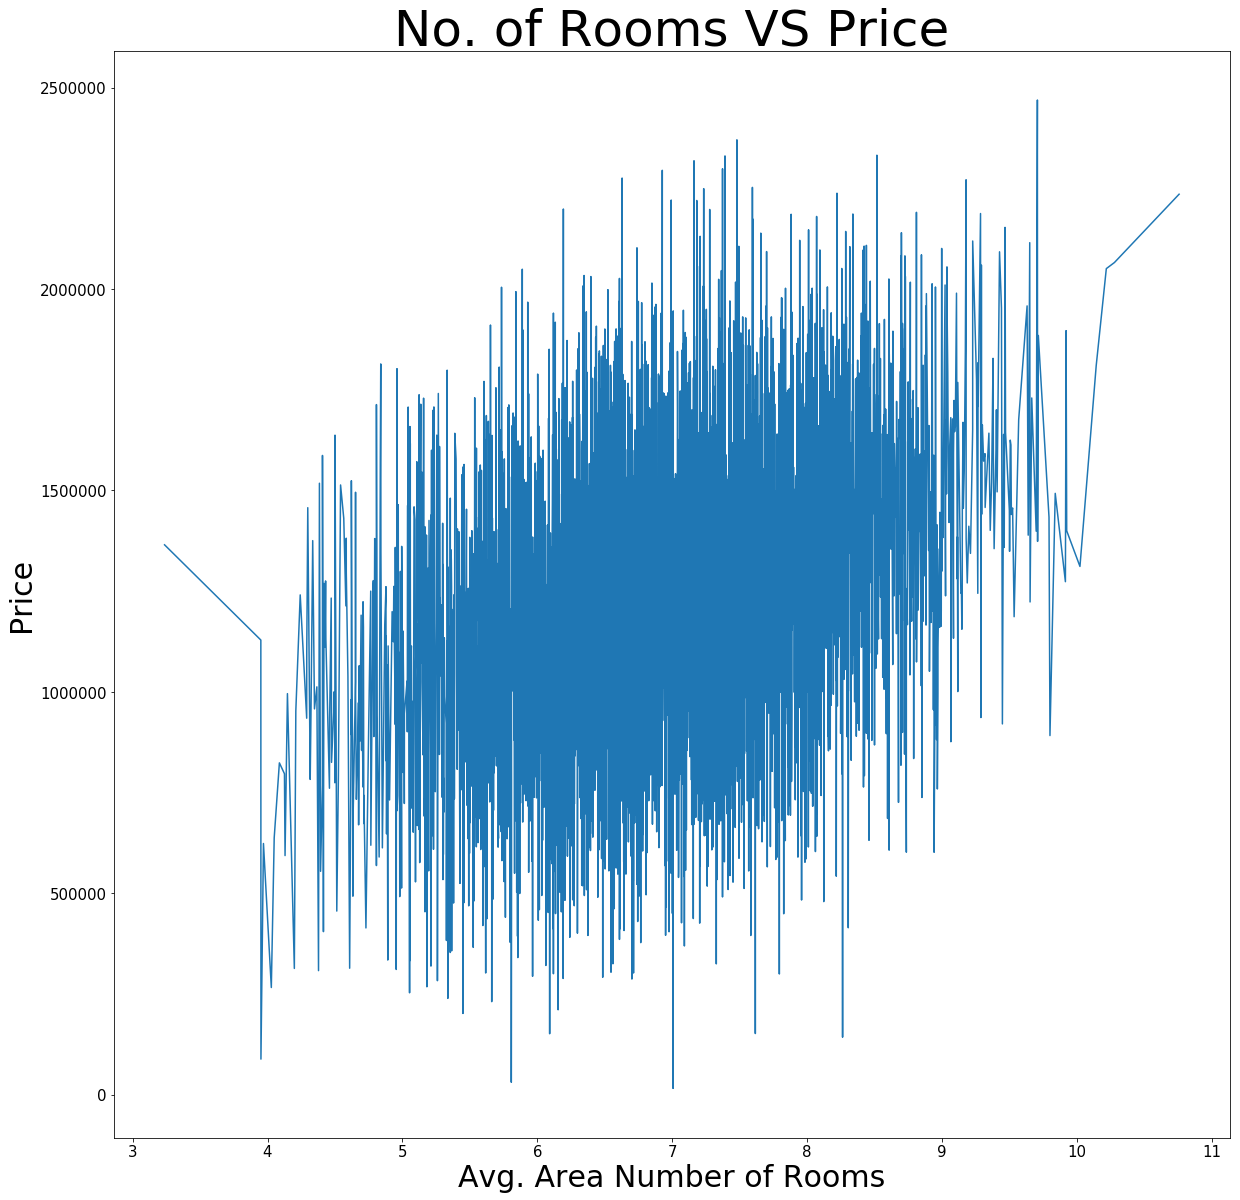

In [28]:
plt.figure(figsize = (20,20))
plt.xlabel('Avg. No of Rooms', fontdict={'fontsize':30})
plt.ylabel('Price',fontdict={'fontsize':30})
plt.title('No. of Rooms VS Price', fontdict={'fontsize':50})
plt.tick_params(labelsize = 15)
sns.lineplot(x['Avg. Area Number of Rooms'], x['Price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC41E83AC8>,
      dtype=object)

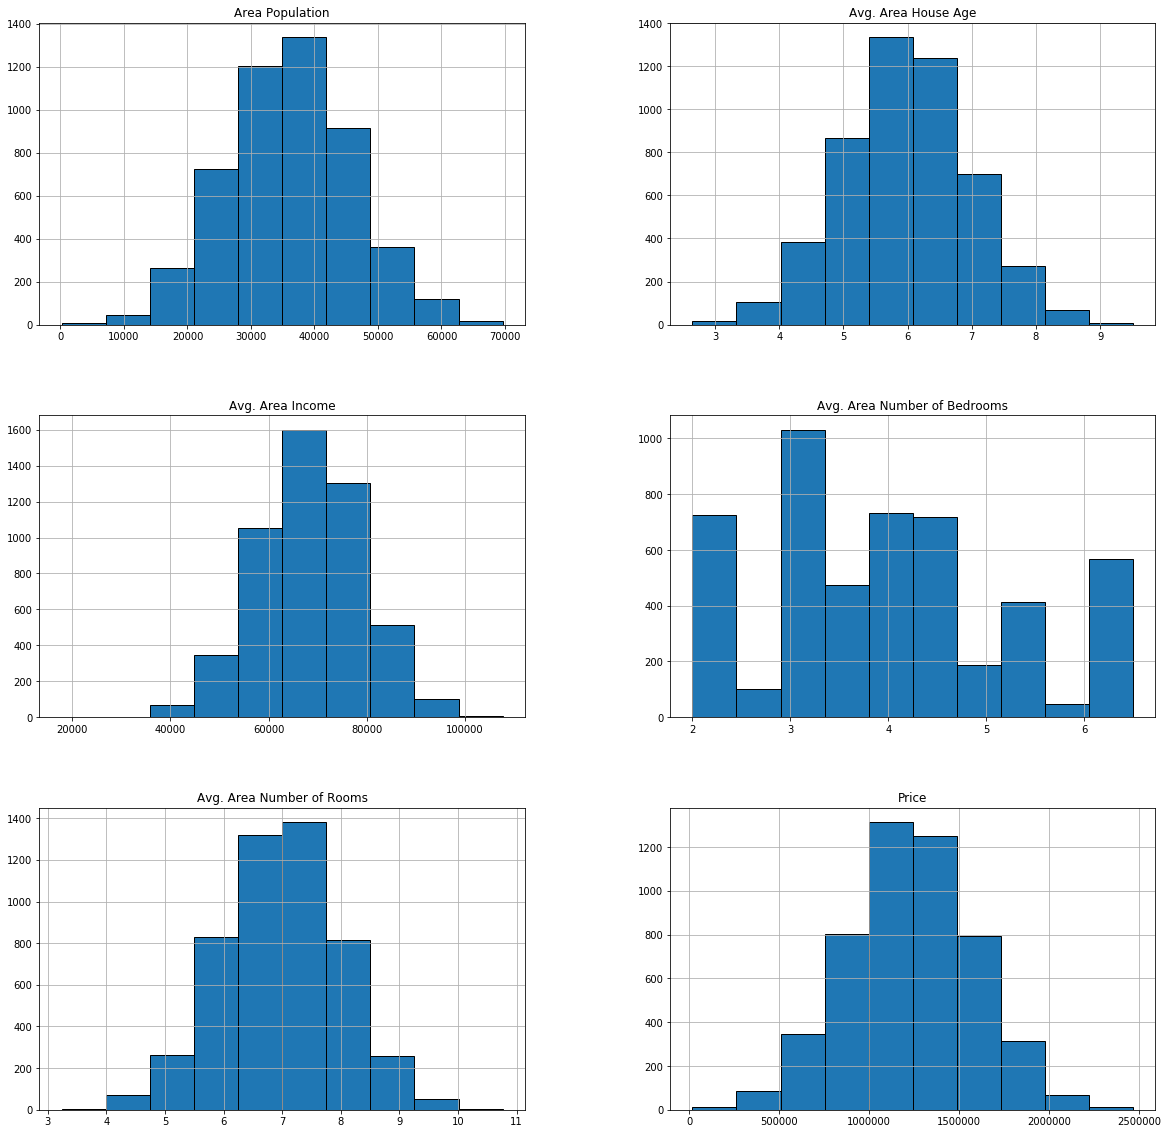

In [29]:
usa_df.hist(figsize=(20,20), edgecolor = 'Black')

Avg. Area Income                   AxesSubplot(0.125,0.657941;0.352273x0.222059)
Avg. Area House Age             AxesSubplot(0.547727,0.657941;0.352273x0.222059)
Avg. Area Number of Rooms          AxesSubplot(0.125,0.391471;0.352273x0.222059)
Avg. Area Number of Bedrooms    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Area Population                       AxesSubplot(0.125,0.125;0.352273x0.222059)
Price                              AxesSubplot(0.547727,0.125;0.352273x0.222059)
dtype: object

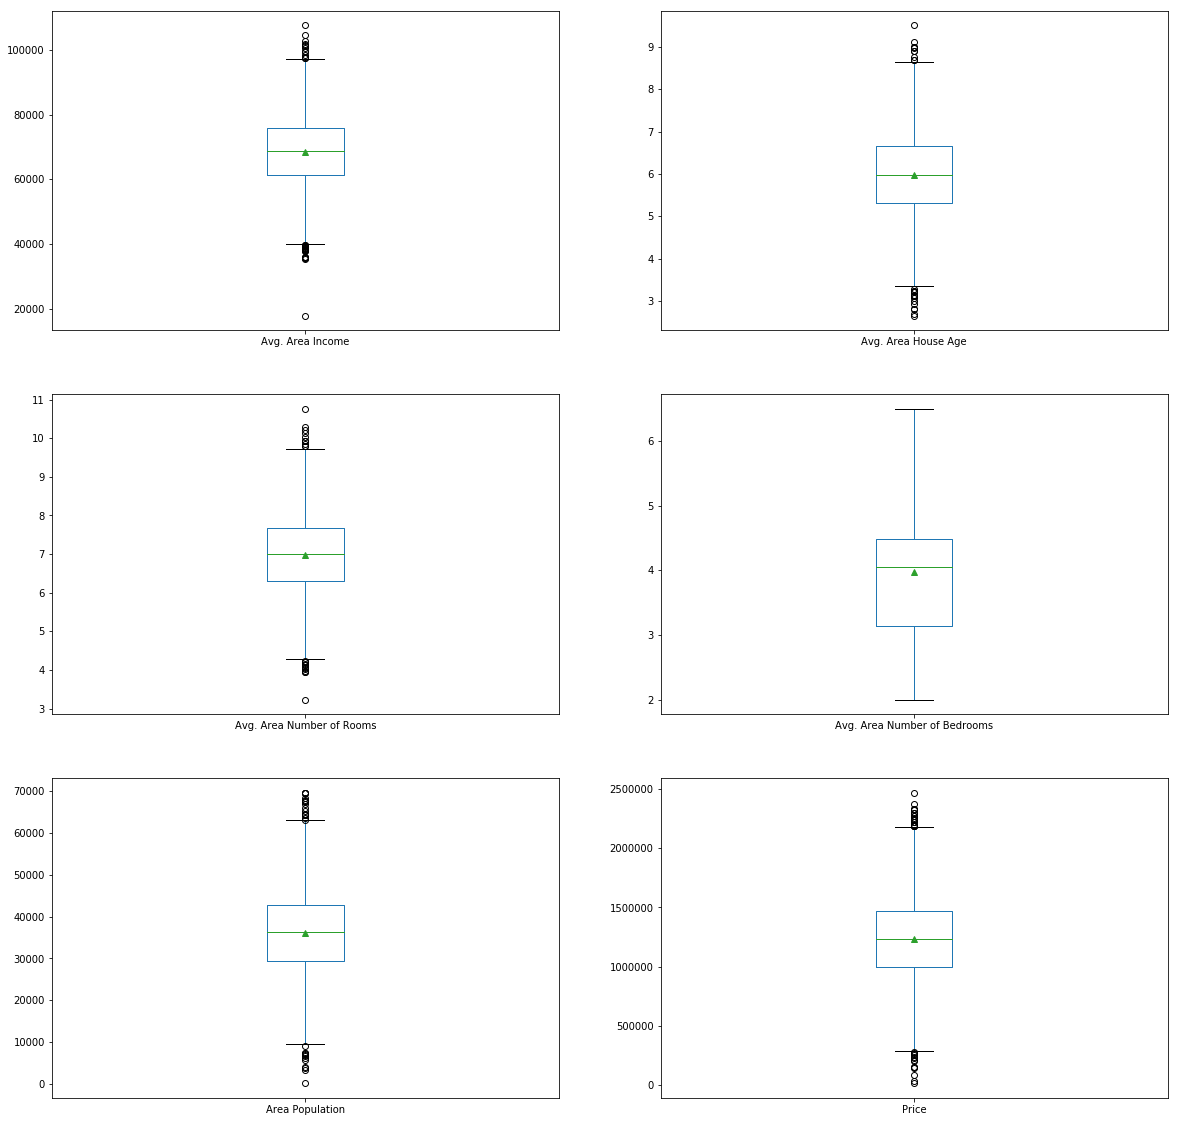

In [30]:
usa_df.plot(kind = 'box', figsize = (20,20), subplots = True, layout = (3,2), showmeans = True)

# GOOD VISUALIZATION FOR THIS DATASET IS NOT POSSIBLE AS ALL THE DATA IS CONTINUOUS AND THE VALUES ARE VERY CLOSE TO EACH OTHER

In [31]:
usa_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [32]:
data = usa_df.values

# LINEAR REGRESSION MODEL

In [84]:
# SPLITTING OF DATA IN TEST AND TRAIN SET
X = data[:,:5]
Y = data[:,5:]
# RANDOM SEED IS EQUAL TO 445 TO RANDOMIZE THE DATA
seed = 445
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = 0.2,random_state = seed)

In [86]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)
print(predictions[:6])
print('Accuracy =',(lr.score(X_test, Y_test))*100,'%')

[[1417169.41882359]
 [1255946.29380614]
 [1584585.86532037]
 [1415778.20267885]
 [ 663145.29646364]
 [1628969.88372681]]
Accuracy = 92.34686651381048 %


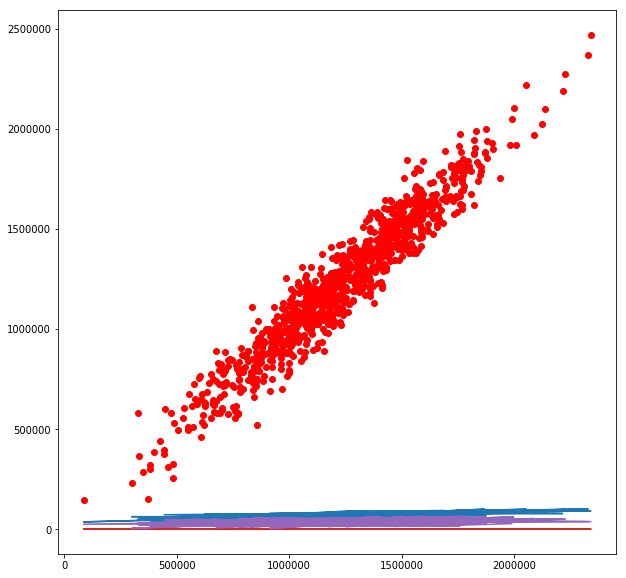

In [108]:
plt.figure(figsize = (10,10))
plt.scatter(predictions, Y_test , color = 'Red')
plt.plot(predictions, X_test)
#plot_linear_regression(Y_test, predictions)

# METRICS

In [109]:
print('MEAN SQUARED ERROR = ',metrics.mean_squared_error(Y_test, predictions))
print('R2 Regression Score Function = ',metrics.r2_score(Y_test, predictions))
print('Explained variance regression score function = ',metrics.explained_variance_score(Y_test,predictions))
print('Linear Model Coefficinet = ', lr.coef_)
print('Intercept = ', lr.intercept_)

MEAN SQUARED ERROR =  9226332133.558052
R2 Regression Score Function =  0.9234686651381048
Explained variance regression score function =  0.9234838452658551
Linear Model Coefficinet =  [[2.15318524e+01 1.66095019e+05 1.21426205e+05 1.00904585e+03
  1.50876358e+01]]
Intercept =  [-2635305.32884315]


In [110]:
usa_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [111]:
feature_matric = pd.DataFrame(zip(usa_df.columns[:5] , [l for m in lr.coef_ for l in m]),
                              columns = ['Feature','Coefficient'])
feature_matric

,Feature,Coefficient
0,Avg. Area Income,21.531852
1,Avg. Area House Age,166095.019446
2,Avg. Area Number of Rooms,121426.205222
3,Avg. Area Number of Bedrooms,1009.045847
4,Area Population,15.087636
